In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pickle 
import numpy as np
import pandas as pd
import torch
import os
from timeit import default_timer as timer
import networkx as nx
import scipy.sparse as sp

In [3]:
from core.SimpleNet import SimpleNet
from core.GraphConvNet import GraphConvNet
from core.EmbeddingDataSet import EmbeddingDataSet
from core.GraphDataBlock import GraphDataBlock
from util.plot_graph_embedding import plot_graph_embedding
from util.evaluation_metrics import evaluate_viz_metrics, trustworthiness, neighborhood_preservation
from util.network_utils import get_net_projection
from util.graph_utils import get_shortest_path_matrix, neighbor_sampling

cuda not available
cuda not available


In [4]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [5]:
if torch.cuda.is_available():
    dtypeFloat = torch.cuda.FloatTensor
    dtypeLong = torch.cuda.LongTensor
    print('cuda available')
    device = 'cuda'
else:
    dtypeFloat = torch.FloatTensor
    dtypeLong = torch.LongTensor
    print('cuda not available')
    device = 'cpu'

cuda not available


In [6]:
dataset_name = 'cora_test'
parent_dir = os.path.abspath('..')
input_dir = os.path.join(parent_dir, 'data')
dataset = EmbeddingDataSet(dataset_name, input_dir, train=True)
dataset.create_all_data(n_batches=1, shuffle=False)
dataset.summarise()

Data blocks of length:  [2708]
Time to create all data (s) = 0.0450
Name of dataset = cora_test
Input dimension = 1433
Number of training samples = 2708
Training labels = True


In [7]:
net_parameters = {}
net_parameters['n_components'] = 2
net_parameters['D'] = dataset.input_dim # input dimension
net_parameters['L'] = 2 # number of hidden layers

In [8]:
# path_matrix = get_shortest_path_matrix(dataset.adj_matrix.toarray())
# print(path_matrix.shape)
# np.save('path_matrix.npy', path_matrix)

## End of boilerplate code

In [9]:
main_dir = os.path.join('results', dataset_name)
main_dir

'results/cora_test'

In [10]:
path_matrix = np.load(os.path.join(input_dir, dataset_name) + '/path_matrix.npy')

In [11]:
# Graph net
def load_net_from_root(root, net_parameters):
    net_parameters['H'] = 128 # number of hidden units
    net_1 = GraphConvNet(net_parameters)
    if torch.cuda.is_available(): net_1.cuda()
    filename = os.path.join(root, 'graph_net_360.pkl')
    checkpoint = torch.load(filename, map_location=device)
    net_1.load_state_dict(checkpoint['state_dict'])
    return net_1

In [12]:
def project_and_eval(net, dataset):
    from sklearn.metrics import silhouette_score
    y_pred = get_net_projection(net, dataset)
    res = evaluate_viz_metrics(y_pred, dataset)
    res['Feature trustworthiness'] = trustworthiness(dataset.inputs, y_pred, metric='cosine')
    res['Graph trustworthiness'] = neighborhood_preservation(y_pred, path_matrix)
    res['Silhouette score'] = silhouette_score(y_pred, dataset.labels)
    return res

In [13]:
from collections import defaultdict

res_summary = defaultdict(list)
for i in range(1, 12):
    root = os.path.join(main_dir, dataset_name) + '_' + str(i)
    net = load_net_from_root(root, net_parameters)
    res = project_and_eval(net, dataset)
    for k, v in res.items():
        res_summary[k].append(v)

Data blocks of length:  [2708]
Time to create all data (s) = 0.0166
One NN accuracy = 0.7001
Avg graph distance = 1.2857
Avg feature distance = 0.9657
Total distance = 2.2514


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0243
One NN accuracy = 0.7149
Avg graph distance = 1.0222
Avg feature distance = 0.9555
Total distance = 1.9776


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0235
One NN accuracy = 0.7692
Avg graph distance = 0.6597
Avg feature distance = 0.9928
Total distance = 1.6526


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0252
One NN accuracy = 0.8050
Avg graph distance = 0.4490
Avg feature distance = 1.1583
Total distance = 1.6073


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0243
One NN accuracy = 0.8434
Avg graph distance = 0.2827
Avg feature distance = 1.1622
Total distance = 1.4449


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0241
One NN accuracy = 0.8523
Avg graph distance = 0.2433
Avg feature distance = 1.3757
Total distance = 1.6190


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0239
One NN accuracy = 0.8589
Avg graph distance = 0.2133
Avg feature distance = 1.3817
Total distance = 1.5951


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0254
One NN accuracy = 0.8545
Avg graph distance = 0.2046
Avg feature distance = 1.5123
Total distance = 1.7169


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0240
One NN accuracy = 0.8571
Avg graph distance = 0.1548
Avg feature distance = 1.4538
Total distance = 1.6087


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0248
One NN accuracy = 0.8490
Avg graph distance = 0.1751
Avg feature distance = 1.6264
Total distance = 1.8015


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0240
One NN accuracy = 0.8456
Avg graph distance = 0.1577
Avg feature distance = 1.6906
Total distance = 1.8483


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [14]:
test_range = np.linspace(0, 1, num=11)

## Citeseer

In [15]:
dataset_name = 'citeseer_test'
dataset = EmbeddingDataSet(dataset_name, input_dir, train=True)
dataset.create_all_data(n_batches=1, shuffle=False)
dataset.summarise()

Data blocks of length:  [3312]
Time to create all data (s) = 0.0364
Name of dataset = citeseer_test
Input dimension = 3703
Number of training samples = 3312
Training labels = True


In [19]:
net_parameters['D'] = dataset.input_dim # input dimension

In [16]:
main_dir = os.path.join('results', dataset_name)
main_dir

'results/citeseer_test'

In [17]:
path_matrix = np.load(os.path.join(input_dir, dataset_name) + '/path_matrix.npy')

In [20]:
from collections import defaultdict

res_summary_2 = defaultdict(list)
for i in range(1, 12):
    root = os.path.join(main_dir, dataset_name) + '_' + str(i)
    net = load_net_from_root(root, net_parameters)
    res = project_and_eval(net, dataset)
    for k, v in res.items():
        res_summary_2[k].append(v)

Data blocks of length:  [3312]
Time to create all data (s) = 0.0706
One NN accuracy = 0.6627
Avg graph distance = 0.8704
Avg feature distance = 0.8559
Total distance = 1.7263


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0739
One NN accuracy = 0.6781
Avg graph distance = 0.4210
Avg feature distance = 0.8659
Total distance = 1.2869


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0743
One NN accuracy = 0.6956
Avg graph distance = 0.2412
Avg feature distance = 0.9283
Total distance = 1.1695


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0715
One NN accuracy = 0.6929
Avg graph distance = 0.1598
Avg feature distance = 1.0205
Total distance = 1.1803


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0713
One NN accuracy = 0.7050
Avg graph distance = 0.1139
Avg feature distance = 1.0086
Total distance = 1.1225


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0746
One NN accuracy = 0.6984
Avg graph distance = 0.0783
Avg feature distance = 1.1774
Total distance = 1.2557


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0766
One NN accuracy = 0.6923
Avg graph distance = 0.0615
Avg feature distance = 1.1303
Total distance = 1.1918


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0754
One NN accuracy = 0.6866
Avg graph distance = 0.0685
Avg feature distance = 1.3369
Total distance = 1.4054


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0740
One NN accuracy = 0.6860
Avg graph distance = 0.0525
Avg feature distance = 1.3536
Total distance = 1.4061


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0756
One NN accuracy = 0.6691
Avg graph distance = 0.0527
Avg feature distance = 1.5175
Total distance = 1.5702


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [3312]
Time to create all data (s) = 0.0735
One NN accuracy = 0.6546
Avg graph distance = 0.0483
Avg feature distance = 1.7211
Total distance = 1.7694


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


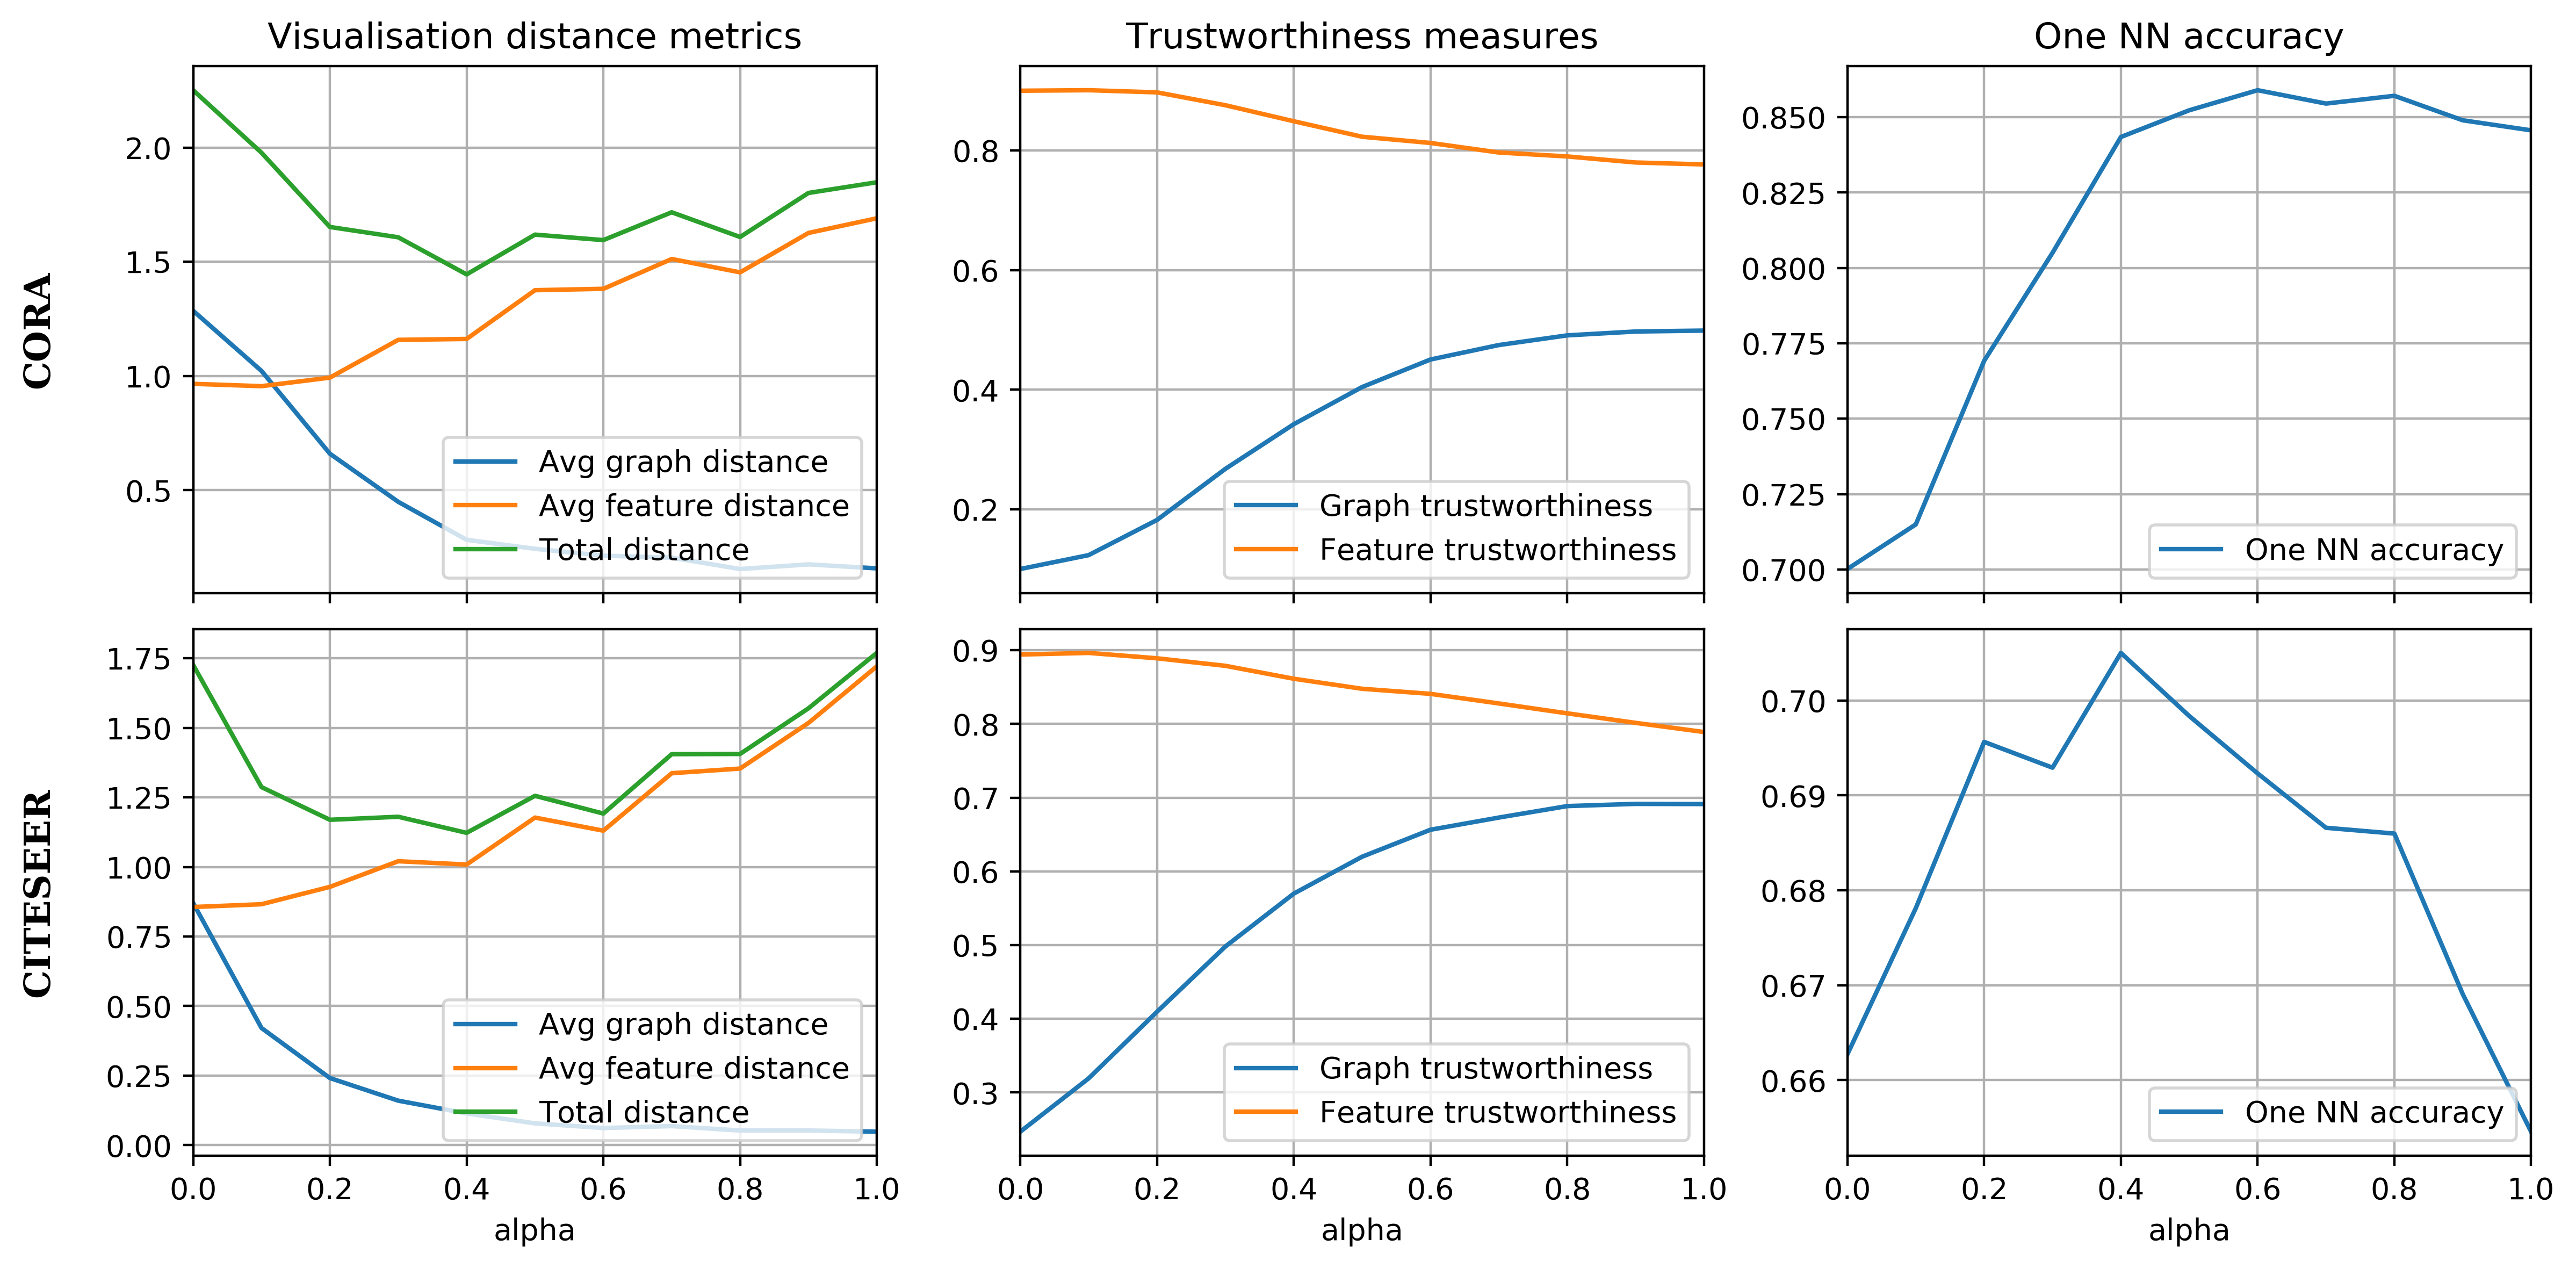

In [27]:
n_rows = 2
labels = ['CORA', 'CITESEER']
summary = [res_summary, res_summary_2]

f, axarr = plt.subplots(n_rows, 3, sharex=True, figsize=(12, 6), dpi=400)
for i in range(n_rows):
    axarr[i,0].plot(test_range, summary[i]['Avg graph distance'], label='Avg graph distance')
    axarr[i,0].plot(test_range, summary[i]['Avg feature distance'], label='Avg feature distance')
    axarr[i,0].plot(test_range, summary[i]['Total distance'], label='Total distance')
    if i == 0:
        axarr[i,0].set_title('Visualisation distance metrics')
    elif i == n_rows-1:
        axarr[i,0].set_xlabel('alpha')
    axarr[i,0].set_xlim(0,1)
    axarr[i,0].set_ylabel(labels[i], fontdict={'fontsize': 12, 'fontweight': 'bold', 'fontname': 'serif'})
    axarr[i,0].yaxis.set_label_coords(-0.2,0.5)
    axarr[i,0].grid()
    axarr[i,0].legend(loc='lower right')

    axarr[i,1].plot(test_range, summary[i]['Graph trustworthiness'], label='Graph trustworthiness')
    axarr[i,1].plot(test_range, summary[i]['Feature trustworthiness'], label='Feature trustworthiness')
    if i==0:
        axarr[i,1].set_title('Trustworthiness measures')
    elif i == n_rows-1:
        axarr[i,1].set_xlabel('alpha')
    axarr[i,1].set_xlim(0,1)
    axarr[i,1].grid()
    axarr[i,1].legend(loc='lower right')

    axarr[i,2].plot(test_range, summary[i]['One NN accuracy'], label='One NN accuracy')
    if i==0:
        axarr[i,2].set_title('One NN accuracy')
    elif i == n_rows-1:
        axarr[i,2].set_xlabel('alpha')
    axarr[i,2].set_xlim(0,1)
    axarr[i,2].grid()
    axarr[i,2].legend(loc='lower right')

# root = os.path.join(main_dir, dataset_name) + '_' + str(7)
# net = load_net_from_root(root, net_parameters)
# y_pred = get_net_projection(net, dataset)
# plot_graph_embedding(y_pred, dataset.labels, dataset.adj_matrix, line_alpha=0.1, s=3, ax=axarr[1,2], title="alpha=0.6")

plt.tight_layout()

# axarr[0,2].set_rasterized(True)
# axarr[1,2].set_rasterized(True)

plt.savefig('alphas.pdf', format='pdf', dpi=1000)

In [ ]:
root = os.path.join(main_dir, dataset_name) + '_' + str(7)
net = load_net_from_root(root, net_parameters)
y_pred = get_net_projection(net, dataset)
plot_graph_embedding(y_pred, dataset.labels, dataset.adj_matrix, line_alpha=0.1)

In [ ]:
assert False 

In [ ]:
def get_net_embeddings(net, dataset, net_type, H=50):
    # Use the model object to select the desired layer
    if net_type == 'graph':
        layer = net._modules['gnn_cells'][0]
    elif net_type == 'simple':
        layer = net._modules['relu']

    # Get the total number of data points
    n = len(dataset.labels)

    # Define a function that will copy the output of a layer
    my_embedding = torch.zeros([n, H])

    def copy_data(m, i, o):
        my_embedding.copy_(o.data)

    # Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)

    # Perform projection to capture embeddings
    get_net_projection(net, dataset)

    return my_embedding

In [ ]:
emb = get_net_embeddings(net, dataset, "graph", H=128)

In [ ]:
emb.shape

In [ ]:
from sklearn.manifold import TSNE
embedder = TSNE(n_components=2, perplexity=30, verbose=1)
y_pred_tsne = embedder.fit_transform(emb)

In [ ]:
res = evaluate_viz_metrics(y_pred_tsne, dataset)
res['Feature trustworthiness'] = trustworthiness(dataset.inputs, y_pred_tsne, metric='cosine')
res['Graph trustworthiness'] = neighborhood_preservation(y_pred_tsne, path_matrix)
res['Silhouette score'] = silhouette_score(y_pred_tsne, dataset.labels)
for k, v in res.items():
    print("{} = {:.4f}".format(k,v))

In [ ]:
plot_graph_embedding(y_pred_tsne, dataset.labels, dataset.adj_matrix, line_alpha=0.1)